<a href="https://colab.research.google.com/github/meeww/Ability-Therapy-Services/blob/master/Google_Image_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Image Style Transfer

Actually I lied. Google Image scraping seems to have limits so instead I use DuckDuckGo for images.

This is a notebook designed to help you view and create
machine learned stylized images.

To run the program all you must do is click at the top:
Runtime > Run All

The program will then begin. Next you must scroll down to Step 4. Open the cell if it is hidden and press play if it has not already begun. 

In the output of Step 4 it will ask you for a search query
Once you type one in and submit it, the program will 
search the internet for images of your query and return a few. The program will then automatically begin training them with tensorflow. Once that is complete it will output your style images as well as your output "stylized" images. The outputed images are saved to /content/drive/MyDrive/GIST/stylized

# Step 1 - Install dependencies!
Install Image Scraper Api from the oh-so generous [Joe Dockrill's DuckDuckGo Image Scraper ](https://https://colab.research.google.com/drive/1FTtNDubkL21kPbQkC6QjGmLtqHgRVsqV#scrollTo=7s60-lBFIome&line=1&uniqifier=1)
using this pip install command:

In [ ]:
!pip install -q jmd_imagescraper

# Step 2 - Write Cache

We don't want to save multiple copies of input images so we can use a memory function to save new words to untitled.txt and ignore duplicates.

In [15]:
directory = '/content/drive/MyDrive/GIST/'
f = open("unknown.txt","a")
f.close();
def memory(query):
  #open list of cached words
  memory = open("unknown.txt", "r")

  #set query default to new word
  newWord=1
  for lines in memory:  #read through lines of heard words
    q = query.replace('\n','')
    line = lines.replace('\n','') #clean up strings
    
    if line == q:  #look for matches and declare matches
      newWord=0    #new words
      print("match")
  if newWord ==1: #after going through lines if query is still new
  # add it to config file to be downloaded. return newword as output
    print(query + " is a new word. Adding it to config.json")
    memory = open("unknown.txt","a")
    memory.write('\n'+query)
  return newWord

# Step 3 - Write a stylizer!
Using tensorflow's arbitrary-image-stylization-v1-256 api,
we can give a model of two datasets. ( The Image to copy the style from , and the image to apply the style to)

In this notebook I wanted to create a model that used it's own input as a style.

Inputs:

*   Path: Style Image directory path, File: Style Image 
*   File name and Extension
*   Epoch: Iterations of training
*   Res: Input + Output Resolution
*   Ind: Index of Images array

In [71]:
def stylize(path,file,epoch,res,ind):
  import os
  import tensorflow as tf
  # Load compressed models from tensorflow_hub
  os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

  import IPython.display as display

  import matplotlib.pyplot as plt

  import numpy as np
  import PIL.Image
  import time
  import functools

  #function to convert a tensor to an image
  def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
      assert tensor.shape[0] == 1
      tensor = tensor[0]
    return PIL.Image.fromarray(tensor)
 
 #get content and style image paths

 #content path noise.jpg is unused right now. Instead content path is = style path
  content_path = tf.keras.utils.get_file('noise.jpg','file://'+directory+'noise.jpg')
  style_path = tf.keras.utils.get_file(file,'file://'+path+"/"+file)
  
  #function to load an image into a tensor
  def load_img(path_to_img):
    max_dim = res          #resolution of input and output 
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

  #function to display an image with a title
  def imshow(image,title=None):
    if len(image.shape) > 3:
      image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
      plt.title(title)

  

  #load style image and content image files
  #here content image is being set to style instead
  style_image = load_img(style_path)
  content_image = load_img(style_path)


  


# train model
  import tensorflow_hub as hub
  
  hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

  #epoch 1
  stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

  #epoch 2+ iterative 
  for i in range(epoch):
    stylized_image = hub_model(tf.constant(stylized_image), tf.constant(style_image))[0]

  #convert stylized tensor back to image
  im1 = tensor_to_image(stylized_image)

  #setup plt figure
  
  

  
  #show style image in column 1
  fig = plt.figure(figsize=(5, 3))
  plt.axis('off');
  imshow(style_image,"style"+str(ind))

  #show stylized image in column 2

  fig = plt.figure(figsize=(5, 3))
  plt.axis('off');
  imshow(stylized_image,"stylized"+str(ind))


  # save stylized image to stylized _index _ .png

  from PIL import Image
  print("Saving file number to /content/drive/MyDrive/GIST/stylized/stylized" +str(ind)+".png")
  im1 = im1.save("/content/drive/MyDrive/GIST/stylized/stylized"+str(ind)+".png")



# Step 4: The Magic :)
First we import the image scraper api as well as a path to the downloads folder we want to save the images to.

Next we set up an input to receive the user's search query
request. We run the memory function on the query to determine whether or not it is a new word and whether or not it should download it or just load it

We then declare a new path with the query included (etc: /downloads/query/...)

Finally we declare a figure size to view our outputed images and we send them to be stylized! The stylize function will train the model and display both the original style image as well as the new stylized image

Please insert your search query: 
complex patterns
Please insert max search results: 
10
complex patterns is a new word. Adding it to config.json
Duckduckgo search: complex patterns


131072/127390 [==============================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized1.png
81920/78147 [===============================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized2.png
98304/96502 [==============================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized3.png
81920/75206 [================================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized4.png
81920/81550 [==============================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized5.png
32768/26448 [=====================================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized6.png
57344/51913 [=================================] - 0s 0us/step
Saving file number to /content/drive/MyDrive/GIST/stylized/stylized7.png
139264/131209 [===============================] - 0s 0us/step

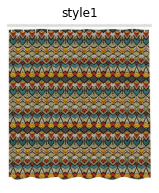

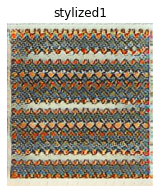

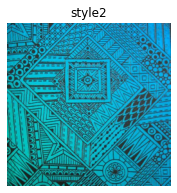

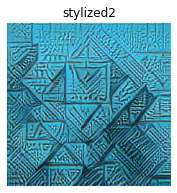

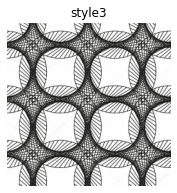

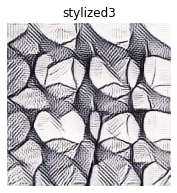

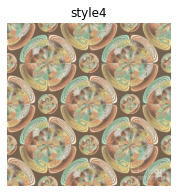

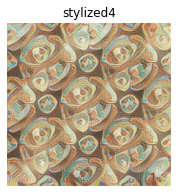

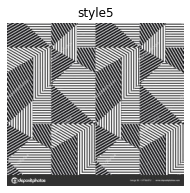

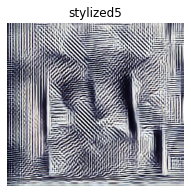

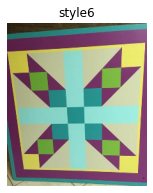

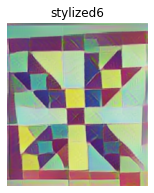

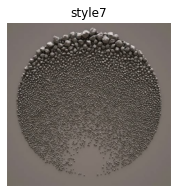

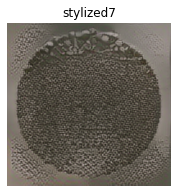

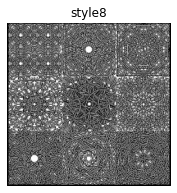

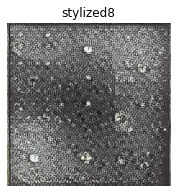

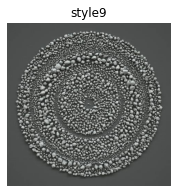

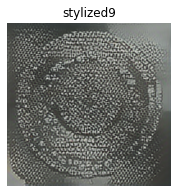

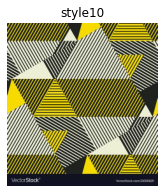

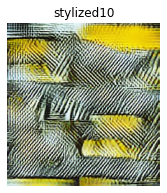

In [73]:
from jmd_imagescraper.core import * #api to scrape duckduckgo
from pathlib import Path
root = Path().cwd()/"drive/MyDrive/GIST/downloads"  #path to image download directory
def search():
  
  query = input("Please insert your search query: \n")
  mres = int(input("Please insert max search results: \n"))
  new = memory(query)   #checks for new words to avoid multiple downloads of images

  if(new==1):
    #imagedownloader
    duckduckgo_search(root, query, query, max_results=mres) ##max results =  amount of images to download and return

  #import drawing tools
  import os
  import matplotlib.image as mpimg
  from matplotlib import pyplot as plt
  path = str(root)+"/"+str(query)       #path = root dir + search query
  ind = 1
  
  import matplotlib as mpl
  mpl.rcParams['figure.figsize'] = (12, 12)
  mpl.rcParams['axes.grid'] = False
  for img in os.listdir(path):          #for all images in directory is UNUSED for now
    stylize(path,img,1,256,ind)                #stylize(path to style image, style image w/ extension, epoch number,
    ind+=1                                   #resolution in pixels; >=256 <= 512 for best results

search()

Tidbit of advice! If the program crashes, try rerunning everything from the beginning.

Second: If you search for an old word and change the amount of search results to be greater than previously downloaded. The program will not download the extra photos.
To do this you must empty out /GIST/unknown.txt and save it
